The composite matrix is:
[[ 0.33333333 -0.9106836   0.24401694  1.75598306]
 [ 0.24401694  0.33333333  0.9106836  -1.64273441]
 [-0.9106836  -0.24401694  0.33333333  3.39871747]
 [ 0.          0.          0.          1.        ]]


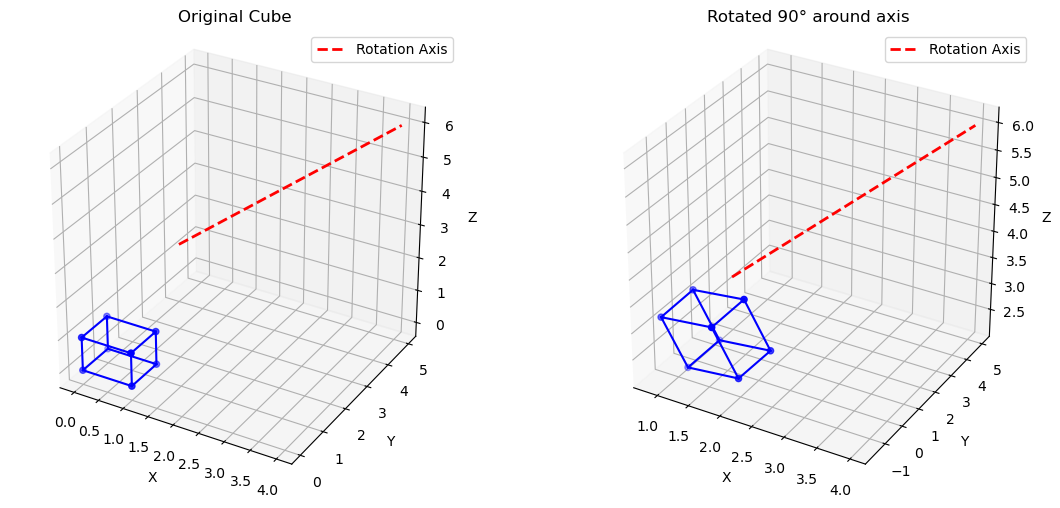

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_cube(vertices, edges, axis_line=None, ax=None, title="3D Cube"):
    """Plot cube and rotation axis"""
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
    # Plot vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
    color='blue')
    
    # Plot edges
    for edge in edges:
        ax.plot([vertices[edge[0], 0], vertices[edge[1], 0]],
            [vertices[edge[0], 1], vertices[edge[1], 1]],
            [vertices[edge[0], 2], vertices[edge[1], 2]], 'b-')

    # Plot rotation axis
    if axis_line is not None:
        ax.plot([axis_line[0], axis_line[3]],
        [axis_line[1], axis_line[4]],
        [axis_line[2], axis_line[5]], 'r--', linewidth=2,label='Rotation Axis')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    return ax

def translate_matrix(x1, y1, z1):
    """Create translation matrix"""
    return np.array([[1,0,0,x1], 
                     [0,1,0,y1], 
                     [0,0,1,z1],
                     [0,0,0,1]])


def rotate_x_matrix(angle):
    """Create rotation matrix for x-axis in degrees"""
    rad = math.radians(angle)
    cos_a, sin_a = math.cos(rad), math.sin(rad)
    return np.array([[1, 0, 0, 0],
                     [0, cos_a, -sin_a, 0],
                     [0, sin_a, cos_a, 0],
                     [0, 0, 0, 1]])


def rotate_y_matrix(angle):
    """Create rotation matrix for y-axis in degrees"""
    rad = math.radians(angle)
    cos_a, sin_a = math.cos(rad), math.sin(rad)
    return np.array([[cos_a, 0, sin_a, 0],
                     [0, 1, 0, 0],
                     [-sin_a, 0, cos_a, 0],
                     [0, 0, 0, 1]])
                     
def rotate_z_matrix(angle):
    """Create rotation matrix for z-axis in degrees"""
    rad = math.radians(angle)
    return np.array([[np.cos(rad), -np.sin(rad), 0, 0],
                     [np.sin(rad), np.cos(rad), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


def arbitrary_rotation_matrix(x1, y1, z1, x2, y2, z2, angle):
    dx= x2-x1
    dy= y2-y1
    dz= z2-z1
    V = math.sqrt(dx**2 + dy**2 + dz**2)   
    a = (x2-x1)/ V
    b = (y2-y1)/ V
    c = (z2-z1)/ V
    d = math.sqrt(b**2 + c**2)
    sin_alpha = b/d
    sin_beta = a
    cos_alpha = c/d
    cos_beta = d
    theta = angle
    
    T1 = translate_matrix(-x1, -y1, -z1)
    Rx = rotate_x_matrix(math.degrees(math.asin(sin_alpha)))
    Ry = rotate_y_matrix(math.degrees(math.asin(sin_beta)))
    Rz = rotate_z_matrix(theta)
    Ry_inv = rotate_y_matrix(-math.degrees(math.asin(sin_beta)))
    Rx_inv = rotate_x_matrix(-math.degrees(math.asin(sin_alpha)))
    T2 = translate_matrix(x1, y1, z1)

    composite = T2 @ Rx_inv @ Ry_inv @ Rz @ Ry @ Rx @ T1
    print("The composite matrix is:")
    print(composite)
    return composite

def create_cube():
    """Create vertices and edges of a cube"""
    vertices = np.array([
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 1],
    [0, 1, 1, 1]
    ])
    edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    return vertices, edges

def transform_vertices(vertices, matrix):
    """Transform vertices using matrix multiplication"""
    return (matrix @ vertices.T)

def main():
    # Create cube
    vertices, edges = create_cube()
    
    # Define rotation axis and angle
    x1, y1, z1 = 1, 2, 3
    x2, y2, z2 = 4, 5, 6
    angle = 90
    
    # Get composite transformation matrix
    composite = arbitrary_rotation_matrix(x1, y1, z1, x2, y2, z2, angle)
    
    # Transform vertices using matrix multiplication
    transformed_vertices = transform_vertices(vertices, composite)
    
    # Visualization
    fig = plt.figure(figsize=(12, 5))
    
    # Original cube
    ax1 = fig.add_subplot(121, projection='3d')
    plot_cube(vertices, edges, [x1, y1, z1, x2, y2, z2], ax1, "Original Cube")
    
    # Transformed cube
    ax2 = fig.add_subplot(122, projection='3d')
    plot_cube(transformed_vertices.T, edges, [x1, y1, z1, x2, y2, z2], ax2, f"Rotated {angle}° around axis")
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()